# Programming Assignment 4
## "What’s with the howling?" - Part 1
<!-- Licensed under (CC BY 4.0) Gert Herold, 2021 -->

Insert the names of the group members here:
  
  * George Kouris
  * Xinchen Yao

When flow passes around a cylindrical body, [vortex streets](https://en.wikipedia.org/wiki/K%C3%A1rm%C3%A1n_vortex_street) often form behind it.
Depending on the medium, flow velocity and diameter of the cylinder, the counter-rotating vortices can cause perceptible sounds.
What that sounds like you can listen to, for example, [here](https://www.youtube.com/watch?v=vplX-qr4AIE), [here](https://www.youtube.com/watch?v=mDn-DNVfr-o), [here](https://www.youtube.com/watch?v=4gKNeU96Jw4), or [here](https://www.youtube.com/watch?v=XCgop5X35yw&t=143s) (the last one exaggerates a little).

In this assignment, you will investigate experimental data to find out how the generated sounds depend on the flow velocity.
For this purpose, the sound radiation of a 6 mm diameter cylinder was recorded in a wind tunnel at 13 different velocities between approx. $8$ and $50\,\frac{\text{m}}{\text{s}}$ and the results were stored in WAV files.

**1) Load the data from the WAV files (time-dependent sound pressure) and extract the corresponding flow velocity in $\frac{\text{m}}{\text{s}}$ from the file names in an automated way. Plot the data for all velocities with correct [x-axis labeling](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html) and [labe](https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib)[ling](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html) of the velocity in separate plots (13 in one column).**


*Notes:*
  * _WAV files contain [digitized time data](https://en.wikipedia.org/wiki/Pulse-code_modulation), e.g. small time variations of air pressure (sound) recorded with microphones can be stored with it._
  * _The WAV data here are stored as integer values. In order to calculate e.g. sound pressures from them, we would have
  to know to which sound pressure value the maximum integer value corresponds. For our calculations here, however, only relative values are of interest, so that a corresponding conversion can be omitted._
  * _The temporal mapping of the values, on the other hand, must be done exactly, for which the 
  [sampling rate](https://en.wikipedia.org/wiki/Sampling_(signal_processing)#Sampling_rate), which is also stored in WAV files, must be known._
  * _As decimal separator for the speed in the file name an "o" was used, so as to to avoid problems with the identification of the file extension._

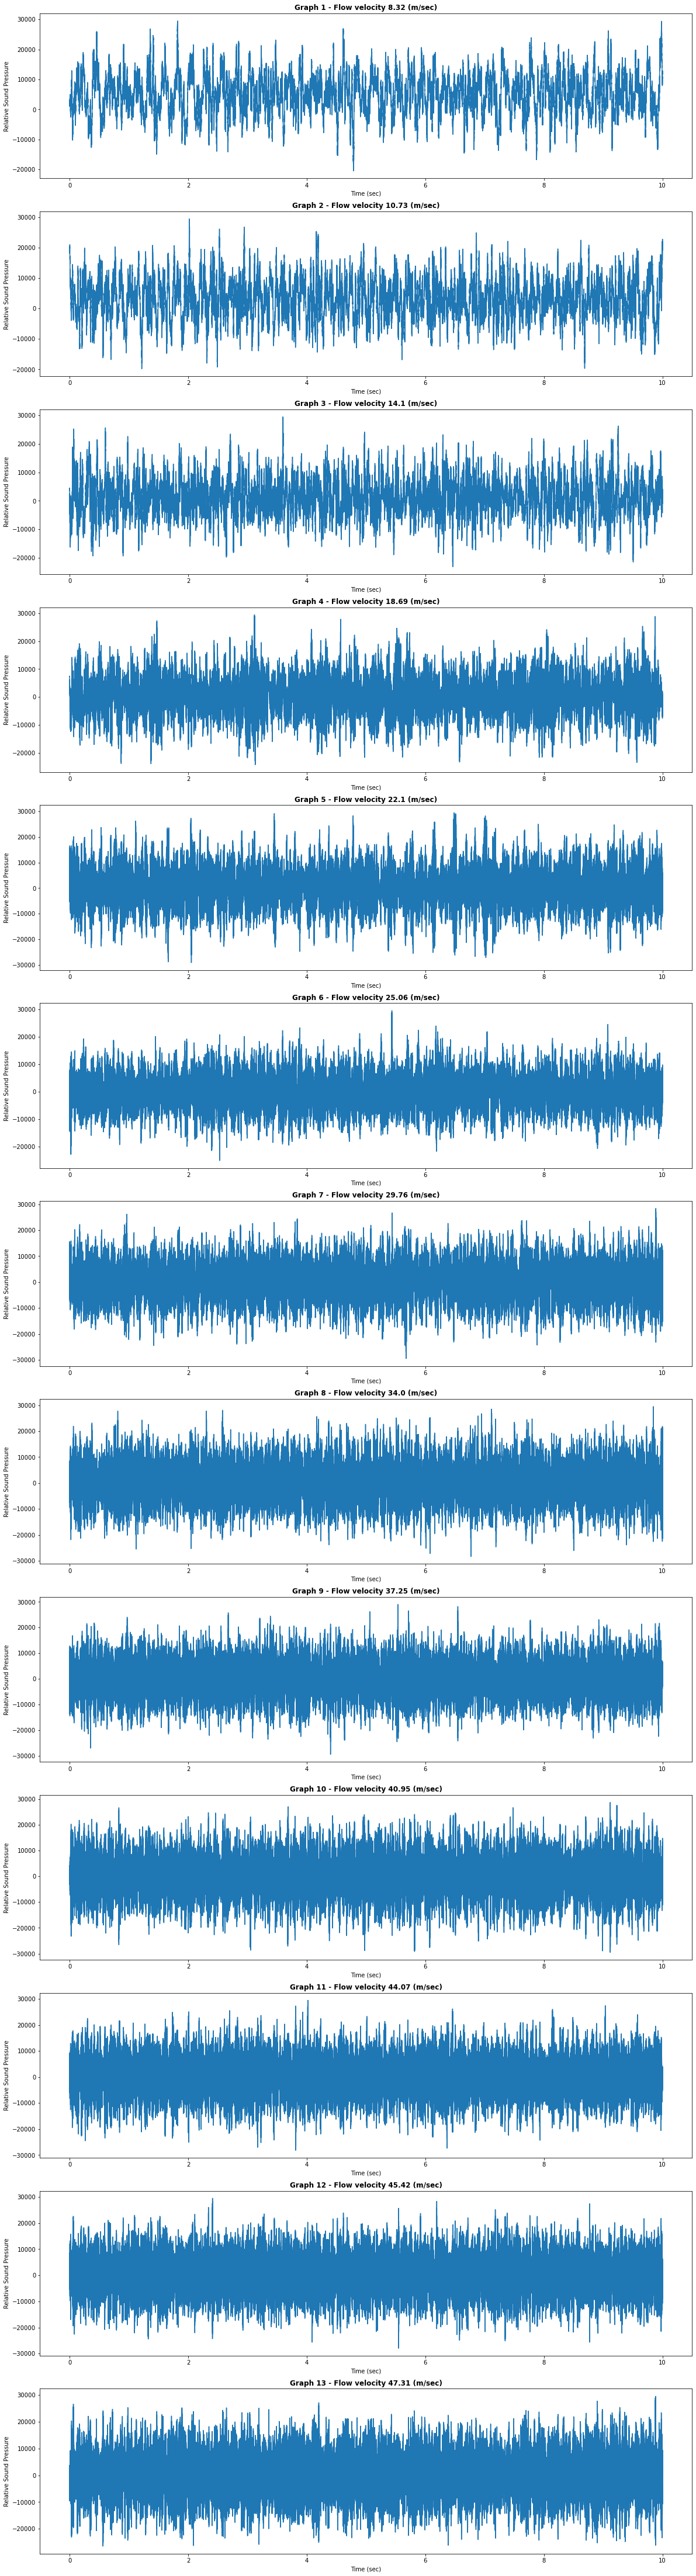

In [129]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.io.wavfile import read
import glob

WavList=glob.glob('wav files/*.wav')
#WavList=os.listdir("wav files")
i=1
velocities=[]
data_=[]
plt.figure(1,(20,80))
for FileName in WavList:
    FileName2=FileName.replace('o','.')
    velocity=float(FileName2[16:21])
    velocities.append(velocity)
    rate, data=read(FileName)
    data_.append(data)
    #duration = len(data)/rate
    #time = np.arange(0,duration,1/rate)
    time=np.arange(len(data))/rate
    
    plt.subplot(13,1,i)
    plt.plot(time, data)
    plt.title('Graph '+str(i)+' - Flow velocity '+str(velocity)+' (m/sec)', fontweight ="bold")
    plt.xlabel('Time (sec)')
    plt.ylabel('Relative Sound Pressure')
    i+=1
plt.show()

For obtaining information about the tones contained in the time data $p(t)$, it is useful to calculate a spectrum $p(f)$ from each of the data sets. 
This is generally done by a [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) or for discretely sampled values by means of a [Discrete Fourier Transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) (DFT). For real-valued signals this is implemented e.g. in the module [*numpy.fft*](https://docs.scipy.org/doc/numpy/reference/routines.fft.html) with the function [*rfft()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfft.html).

**2) Calculate the spectra ( squared amplitude versus frequency) of all time signals and plot them on one figure:**

  * Calculate the magnitude square $|p(f)|^2$ for the individual values.
  * Plot these only for frequencies [up to](https://docs.scipy.org/doc/numpy/reference/generated/numpy.searchsorted.html) 2500 Hz. Label the x-axis correctly.
  * To make the possibly hidden variatopm of some spectra visible, set the parameter *alpha* of the plot function to a value smaller than 1.
  * Choose a sufficient size of the plot.
  * Plot the y-axis with logarithmic scaling.
  * Add a legend to the figure so that the respective spectra can be identified.
  
_Note: The associated frequencies can be calculated using the function [rfftfreq()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.rfftfreq.html). 
Number of samples as well as sampling rate are already known from Task 1._

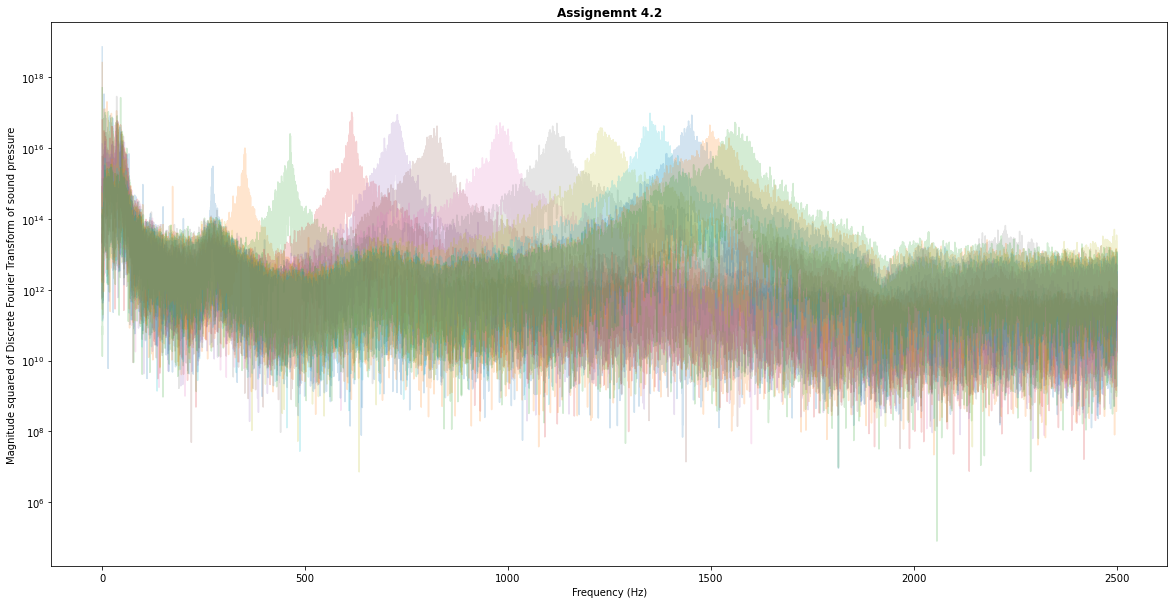

In [131]:
plt.figure(1,(20,10))

freq=np.fft.rfftfreq(len(data_[0]), 1/rate)
pf2_=[]
for i in enumerate(WavList):
    
    pf=np.fft.rfft(data_[i[0]])
    pf2=abs(pf)**2
    pf2_.append(pf2)
    freq2500_index=np.searchsorted(freq, 2500)

    freq2500=freq[0:freq2500_index]
    pf2500=pf2[0:freq2500_index]
    plt.plot(freq2500, pf2500, alpha=0.2)
    
plt.yscale('log')
plt.title('Assignemnt 4.2', fontweight='bold')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude squared of Discrete Fourier Transform of sound pressure')
plt.show()

**3) For each flow speed, find the distinctive tone (i.e., the maximum value in the spectrum).**

  * Neglect frequencies below 100 Hz in your evaluation.
  * Print the characteristic frequency $f$ for each velocity $v$ in a well-readable format, e.g.: `v: 0.00 m/s, f: 0.0 Hz`

In [135]:
v3=[]
f3=[]
for i in enumerate(WavList):
    freq100_index=np.searchsorted(freq, 100)
    pf2_100=pf2_[i[0]][freq100_index:]
    char_freq_index=np.where(pf2_100==max(pf2_100))[0][0]+freq100_index
    char_freq=freq[char_freq_index]
    v3.append(velocities[i[0]])
    f3.append(char_freq)
    print('v: %-5.2f m/s, f: %.1f Hz' % (velocities[i[0]], char_freq))
v3=np.array(v3)
f3=np.array(f3)

v: 8.32  m/s, f: 272.8 Hz
v: 10.73 m/s, f: 351.7 Hz
v: 14.10 m/s, f: 463.0 Hz
v: 18.69 m/s, f: 614.7 Hz
v: 22.10 m/s, f: 727.2 Hz
v: 25.06 m/s, f: 825.0 Hz
v: 29.76 m/s, f: 980.2 Hz
v: 34.00 m/s, f: 1120.1 Hz
v: 37.25 m/s, f: 1227.6 Hz
v: 40.95 m/s, f: 1349.7 Hz
v: 44.07 m/s, f: 1452.6 Hz
v: 45.42 m/s, f: 1497.1 Hz
v: 47.31 m/s, f: 1559.2 Hz


Assume that there is an approximately linear relationship between the two quantities $v$ and $f$. 
To determine it, a [regression line](https://en.wikipedia.org/wiki/Simple_linear_regression) is to be calculated.
A straight line in two-dimensional space is defined by 2 parameters $a, b$:

$$
f = a\,v + b
$$

The coefficients $a$ and $b$ of the regression line are calculated via:

$$
a=\frac{\sum_{i=1}^{N} (v_i - \overline v)(f_i - \overline f)}{\sum_{i=1}^{N}(v_i - \overline v)^2}\\
b=\overline f - a\,\overline v
$$

__4) Write a function *ab()* that calculates and returns the straight line parameters *a* and *b* for arbitrary same-length arrays *v* and *f*.__

In [136]:
def ab(v,f):
    length=len(v)
    
    v_=sum(v)/length
    f_=sum(f)/length

    #sum_v=sm(v-v_)
    sum_vf=sum((v-v_)*(f-f_))
    sum_v2=sum((v-v_)**2)
    
    a=(sum_vf)/sum_v2
    b=f_-a*v_
        
    return a,b

**5) Apply the function to the pairs of values from part 3 and draw the regression line (as a _line_) together with the initial values (as _points_) on a graph.**

  * Ensure correct axis labels.
  * Also calculate what characteristic tones would be expected at $v=15\,\frac{\text{m}}{\text{s}}$, $v=42\,\frac{\text{m}}{\text{s}}$, and $v=50\,\frac{\text{m}}{\text{s}}$.
  * Draw the deviation of the measured values from the regression line in a separate diagram.
  * What are the mean value and standard deviation of these deviations?

Characteristic tone when velocity is 15 m/s is 492.92 Hz
Characteristic tone when velocity is 42 m/s is 1384.20 Hz
Characteristic tone when velocity is 50 m/s is 1648.28 Hz
Mean Value of Deviation: 0.00 Hz
Standard Deviation: 0.18 Hz


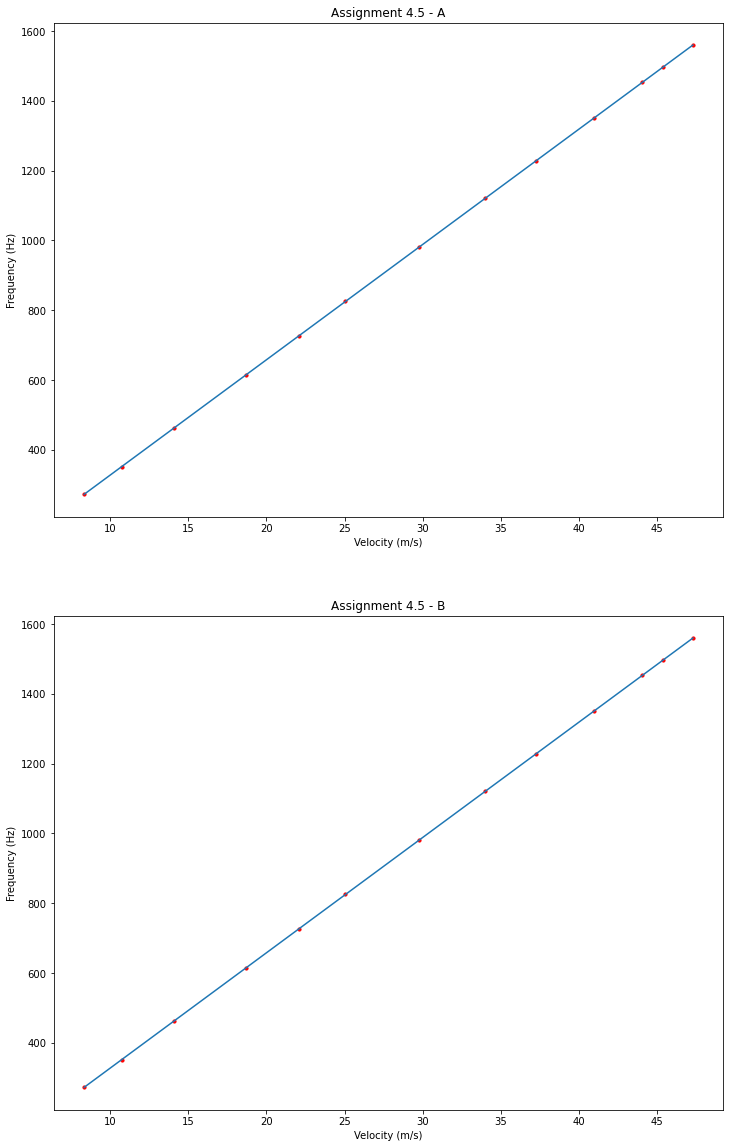

In [139]:
from statistics import stdev
a,b=ab(v3, f3)
plt.figure(1,(12,20))
plt.subplot(2,1,1)
plt.plot(v3, a*v3+b)
plt.scatter(v3, f3, c='red', s=10)
plt.title('Assignment 4.5 - A')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Frequency (Hz)')

for velocity in [15, 42, 50]:
    print('Characteristic tone when velocity is %d m/s is %.2f Hz' % (velocity, a*velocity+b))

plt.subplot(2,1,2)
plt.plot(v3, a*v3+b)
plt.scatter(v3, f3, c='red', s=10)
plt.title('Assignment 4.5 - B')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Frequency (Hz)')
dev=[]
for velocity in enumerate(v3):
    plt.plot([velocity[1], velocity[1]],[a*velocity[1]+b, f3[velocity[0]]], c='black')
    dev.append((a*velocity[1]+b) - (f3[velocity[0]]))
    
dev_mean_value=sum(dev)/len(dev)
print('Mean Value of Deviation: %.2f Hz' % dev_mean_value)
dev_standard=np.std(dev)
print('Standard Deviation: %.2f Hz' % dev_standard)
plt.show()